**Polynomial Regression**

In [11]:
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [6]:
#return the prediction of x data, by using kernel fucntion
def polynomial_regression (X,y):
  a12 =0; a13=0; a14=0; a23 =0; a24=0; a33=0; a34 =0
  for i in range (len(X)):
    x_e2 = X[i]*X[i]; x_e3 = x_e2*X[i]; x_e4= x_e3*X[i]
    a12 += X[i]; a13 +=x_e2; a14 +=y[i]
    a23 += x_e3; a24+=X[i]*y[i]
    a33 +=x_e4; a34 += x_e2*y[i]
  a11 = len(X);a21 = a12; a22 = a13; a31 = a13; a32 = a23;
  aux1 = a23/a13; aux2 = a33/a13;
  b11 = aux1*a11-a21; b12 = aux1*a12-a22; b13 = aux1*a14-a24
  b21  = aux2*a11-a31; b22 = aux2-a32; b23 = aux2*a14-a34
  a0 = ((b22/b12)*b13-b23)/((b22/b12)*b11-b21)
  a1 = (b23-b21*a0)/b22
  a2 = (a24 - a21*a0-a22*a1)/a23
  return a0, a1, a2

In [7]:
def prediction(a0, a1, a2, x):
  return a0+a1*x+a2*x*x   

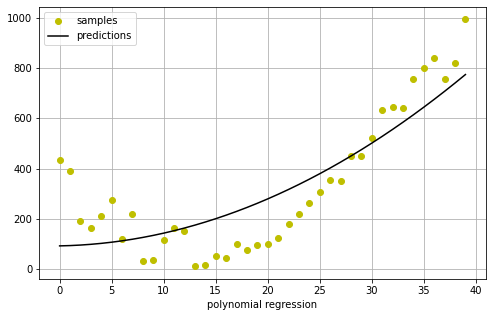

In [10]:
#linear regression evolution 
fig, axs = plt.subplots(figsize = (8,5))

#create the samples
X= list(range(40))
y=[]
for i in range(len(X)):
  y.append((X[i]-10)**2 + random.random()*20*abs(len(X)/2-i))

y_prediction = []
a0,a1,a2 = polynomial_regression(X,y)

for i in range(len(X)):
  y_prediction.append(prediction(a0, a1, a2, X[i]))

axs.plot(X, y, 'yo', label = 'samples')  # It plot samples 
axs.plot(X, y_prediction, 'k-', label = 'predictions') # It plot predictions
axs.set_xlabel('polynomial regression')
axs.legend(); axs.grid();
plt.show()

#**Polinomial Regression with gradient descent**

In [21]:
def gradient_regression(X,y, alpha, b, w):
  dw1 = 0.0; dw2 = 0.0; db=0.0
  for i in range(len(X)):
    aux = -2.0*(y[i]-(w[0]*X[0][i]+w[1]*X[1][i]+b))
    db = db + aux #this solver it will overflow
    dw1 = dw1 + X[0][i]*aux #this solver it will overflow
    dw2 = dw2 + X[0][i]*aux #this solver it will overflow
  aux = 1.0/float(len(X[0]))
  b = b - aux*db*alpha
  w[0] = w[0] - aux*dw1*alpha
  w[1] = w[1] - aux*dw1*alpha
  return b, w

In [22]:
def gradient_regression2(X,y, alpha, b, w):
  aux = -2*(y-(w*X+b)).sum()
  b = b - alpha* aux/ float(len(X[0]))
  w= w -alpha*aux/float(len(X[0]))
  return b, w 

In [23]:
def normalize(x):
  #it can also be don by using the scypt (stats) zscore
  mean = np.mean(x)
  sdeviation = np.std(x)
  y= (x-mean)/sdeviation
  return y

In [54]:
np.random.seed(10)
# create the samples
X = [[],[]]
y = []
result = []
for i in range(100):
  X[0].append(i+random.random()*10)
  X[1].append(i**2 + random.random()*2)
  # y.append((X[0][i]+20 + random.random()*10)+(X[1][i]-10 + random.random()*10))
  y.append((i**2+random.random()+70))

In [55]:
X[0] = normalize(X[0])
X[1] = normalize(X[1])  
y = normalize(y)

In [56]:
alpha = 0.1
b = random.random()
w = np.random.rand(2,1);
w = np.array(w)
epochs = 5

for e in range(epochs):
  b,w = gradient_regression(X,y, alpha, b, w)
result = w.T@X + b

<ipython-input-61-d5a0e6e46951>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axs = Axes3D(fig, elev =35, azim =-45)


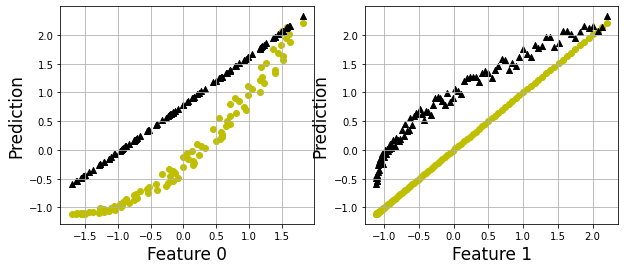

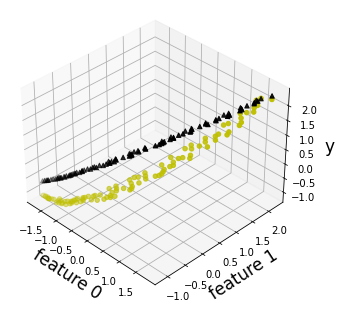

In [61]:
fig, axs  = plt.subplots(1,2, figsize = (10,4))
for i in [0,1]:
  axs[i].scatter(X[i], y, c='y', marker = 'o')
  axs[i].scatter(X[i], result, c='k', marker ='^')
  axs[i].set_xlabel('Feature '+ str(i), fontsize= 17)
  axs[i].set_ylabel('Prediction', fontsize= 17)
  axs[i].grid();

fig = plt.figure(figsize = (40,4))
axs = Axes3D(fig, elev =35, azim =-45)
axs.scatter(X[0], X[1], y, c='y', marker ='o')
axs.scatter(X[0], X[1], result, c='k', marker = '^')
axs.set_xlabel('feature 0', fontsize = 17)
axs.set_ylabel('feature 1', fontsize = 17)
axs.set_zlabel('y', fontsize = 17)
axs.grid()
plt.show()